# XGBoost

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 CPU 환경에서 빠르게 학습 가능

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-whitegrid'])

## 파이썬 기반 XGBoost

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [11]:
params = {
    'max_depth': 3,
    'eta' : 0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stopping':100
}
num_rounds=400

In [12]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=evals)

[0]	train-logloss:0.57969	eval-logloss:0.57574
[1]	train-logloss:0.51209	eval-logloss:0.51024
[2]	train-logloss:0.45618	eval-logloss:0.45606
[3]	train-logloss:0.40938	eval-logloss:0.41211
[4]	train-logloss:0.36912	eval-logloss:0.37292
[5]	train-logloss:0.33476	eval-logloss:0.34081
[6]	train-logloss:0.30570	eval-logloss:0.31115
[7]	train-logloss:0.27823	eval-logloss:0.28527
[8]	train-logloss:0.25407	eval-logloss:0.26366
[9]	train-logloss:0.23435	eval-logloss:0.24322
[10]	train-logloss:0.21539	eval-logloss:0.22644
[11]	train-logloss:0.19997	eval-logloss:0.21051
[12]	train-logloss:0.18513	eval-logloss:0.19655
[13]	train-logloss:0.17116	eval-logloss:0.18668


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:26:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "early_stopping" } are not used.

  warnings.warn(smsg, UserWarning)


[14]	train-logloss:0.15876	eval-logloss:0.17321
[15]	train-logloss:0.14766	eval-logloss:0.16354
[16]	train-logloss:0.13777	eval-logloss:0.15501
[17]	train-logloss:0.12812	eval-logloss:0.14774
[18]	train-logloss:0.12007	eval-logloss:0.13865
[19]	train-logloss:0.11310	eval-logloss:0.13227
[20]	train-logloss:0.10654	eval-logloss:0.12676
[21]	train-logloss:0.09966	eval-logloss:0.12295
[22]	train-logloss:0.09434	eval-logloss:0.11855
[23]	train-logloss:0.08941	eval-logloss:0.11297
[24]	train-logloss:0.08434	eval-logloss:0.11013
[25]	train-logloss:0.07946	eval-logloss:0.10772
[26]	train-logloss:0.07554	eval-logloss:0.10419
[27]	train-logloss:0.07179	eval-logloss:0.10120
[28]	train-logloss:0.06807	eval-logloss:0.09806
[29]	train-logloss:0.06479	eval-logloss:0.09406
[30]	train-logloss:0.06174	eval-logloss:0.09215
[31]	train-logloss:0.05911	eval-logloss:0.09086
[32]	train-logloss:0.05656	eval-logloss:0.08942
[33]	train-logloss:0.05401	eval-logloss:0.08770
[34]	train-logloss:0.05172	eval-logloss:

In [15]:
import numpy as np
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10]))

[1. 1. 0. 1. 0. 1. 1. 1. 1. 1.]


In [18]:
preds = [1 if x > 0.5 else 0 for x in predicts]
print(preds[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [20]:
print("정확도: {}".format(accuracy_score(y_test, preds)))
print("정밀도: {}".format(precision_score(y_test, preds)))
print("재현율: {}".format(recall_score(y_test, preds)))


정확도: 0.9736842105263158
정밀도: 0.972972972972973
재현율: 0.9863013698630136


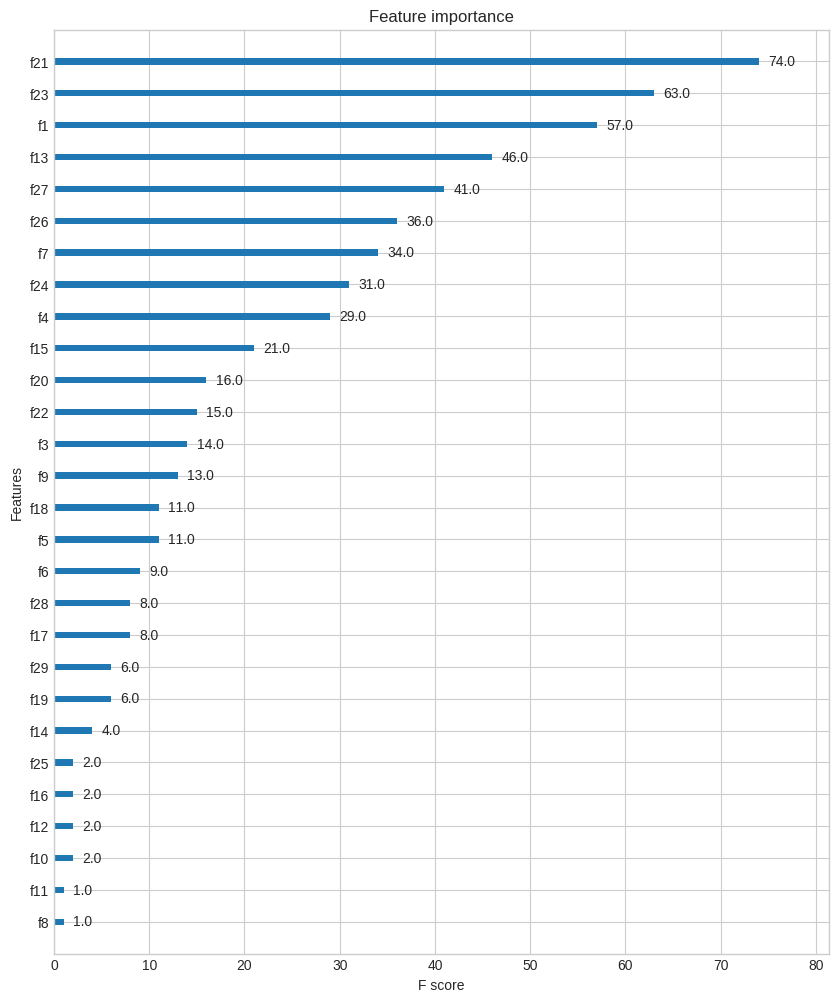

In [23]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax);

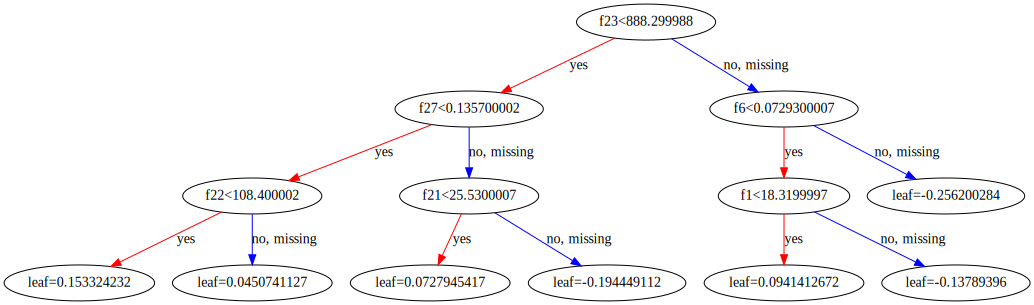

In [27]:
dot_data = xgb.to_graphviz(xgb_model)
dot_data_string = dot_data.source
graph = graphviz.Source(dot_data_string)
graph

## XGBClassifier

### 붓꽃 데이터

In [28]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [29]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:,1]

In [30]:
cross_val = cross_validate(
    estimator=xgbc,
    X=iris.data,
    y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.3907027721405029 (+/- 0.2351464626448546)
avg score time: 0.010066413879394531 (+/- 0.01020276213530141)
avg test score: 0.9533333333333334 (+/- 0.016329931618554516)


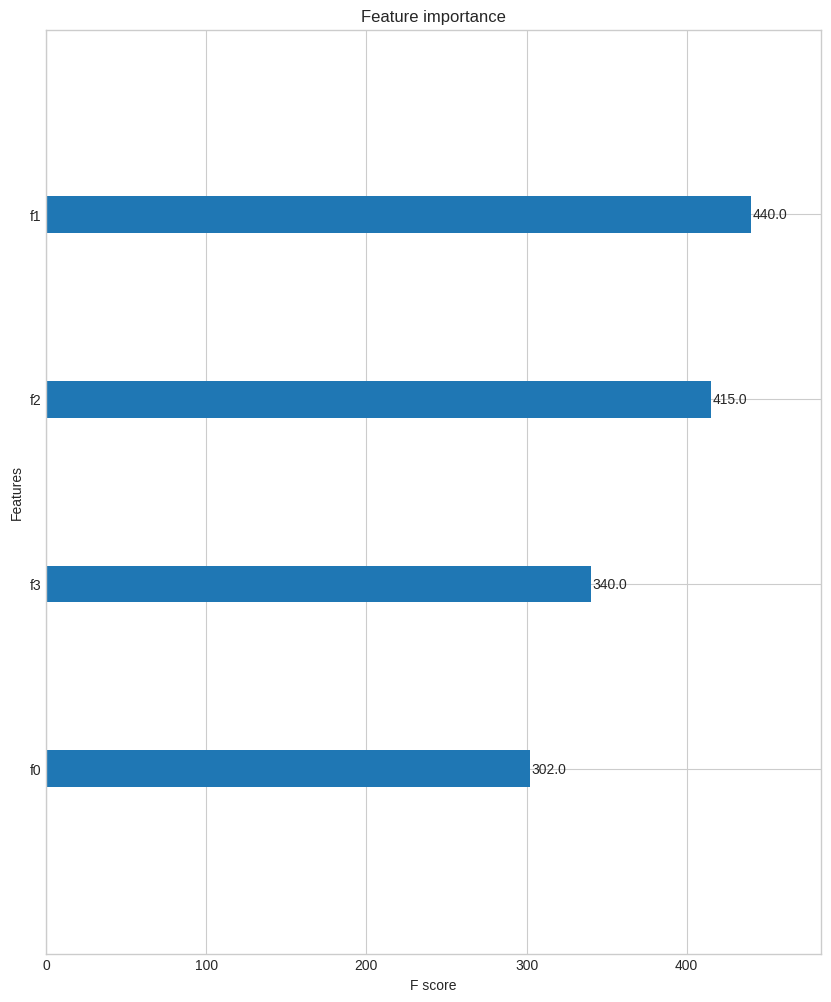

In [31]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax);

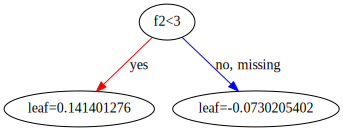

In [33]:
import graphviz
from xgboost import XGBClassifier
from xgboost import to_graphviz



dot_data = to_graphviz(xgbc)
graph = graphviz.Source(dot_data.source)
graph

### 와인 데이터

In [34]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)

In [36]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)

In [38]:
cross_val = cross_validate(
    estimator=xgbc,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.40418353080749514 (+/- 0.30270103396032255)
avg score time: 0.006897640228271484 (+/- 0.004681530818261435)
avg test score: 0.9553968253968254 (+/- 0.03325538883960416)


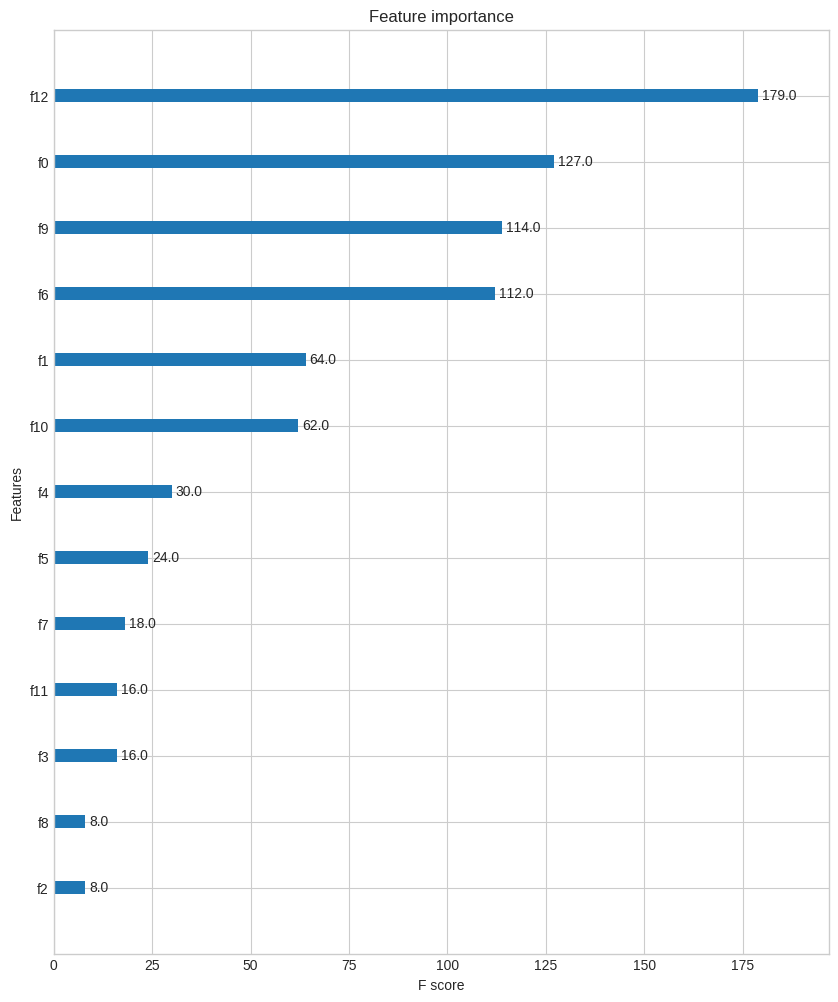

In [39]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax);

### 유방암 데이터

In [40]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)

In [41]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)

In [43]:
cross_val = cross_validate(
    estimator=xgbc,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 1.2505014896392823 (+/- 1.1821933174492976)
avg score time: 0.015392589569091796 (+/- 0.016241603763565936)
avg test score: 0.9718677224033534 (+/- 0.010273004420318711)


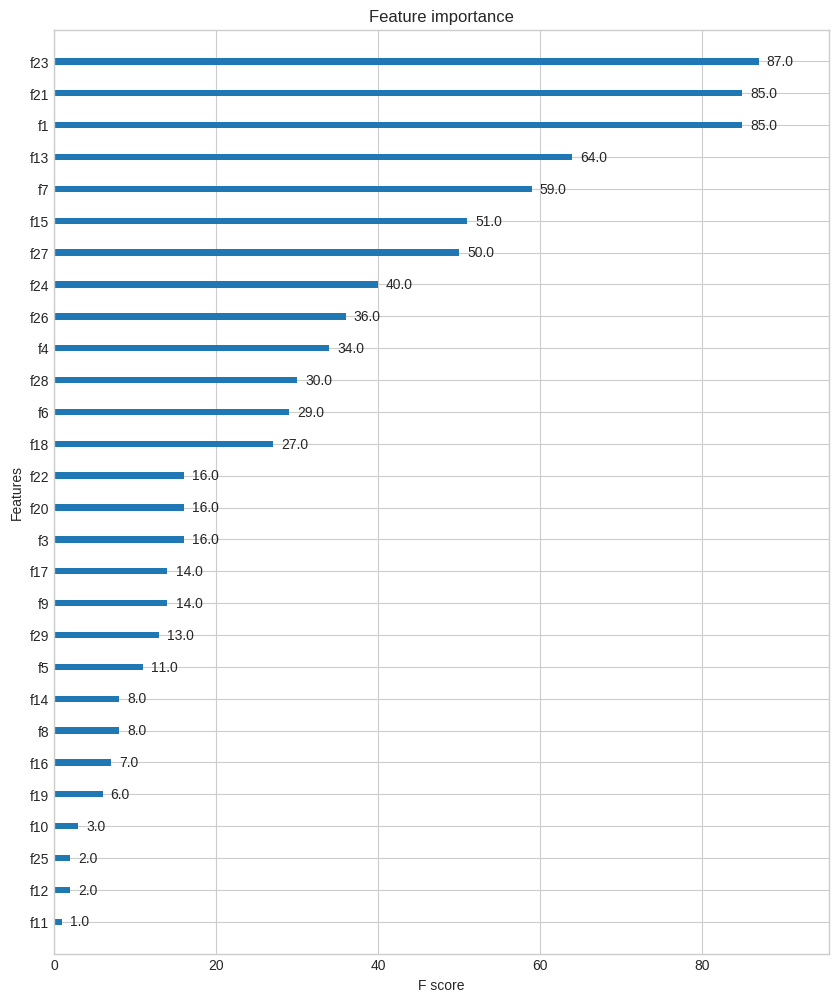

In [44]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax);

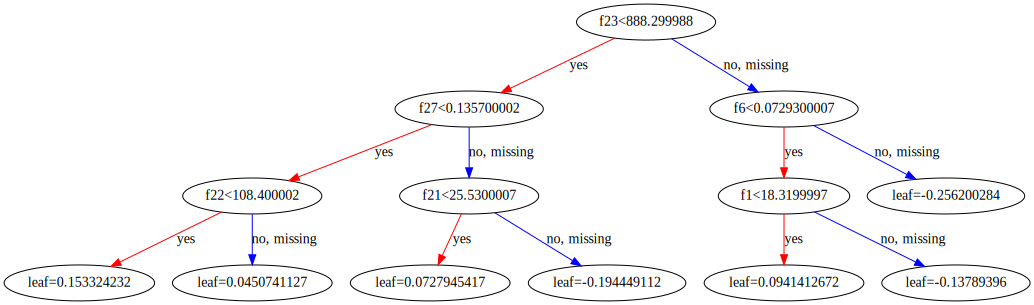

In [45]:
dot_data = xgb.to_graphviz(xgbc)
dot_data_string = dot_data.source
graph = graphviz.Source(dot_data_string)
graph

## XGBRegressor

### 당뇨병 데이터

In [46]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)

In [47]:
xgbc = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)

In [48]:
cross_val = cross_validate(
    estimator=xgbc,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time : 0.4613838195800781 (+/- 0.2769406416661608)
avg score time : 0.005215740203857422 (+/- 0.0041689484763628055)
avg test score : 0.3028089266858058 (+/- 0.0860008532979482)


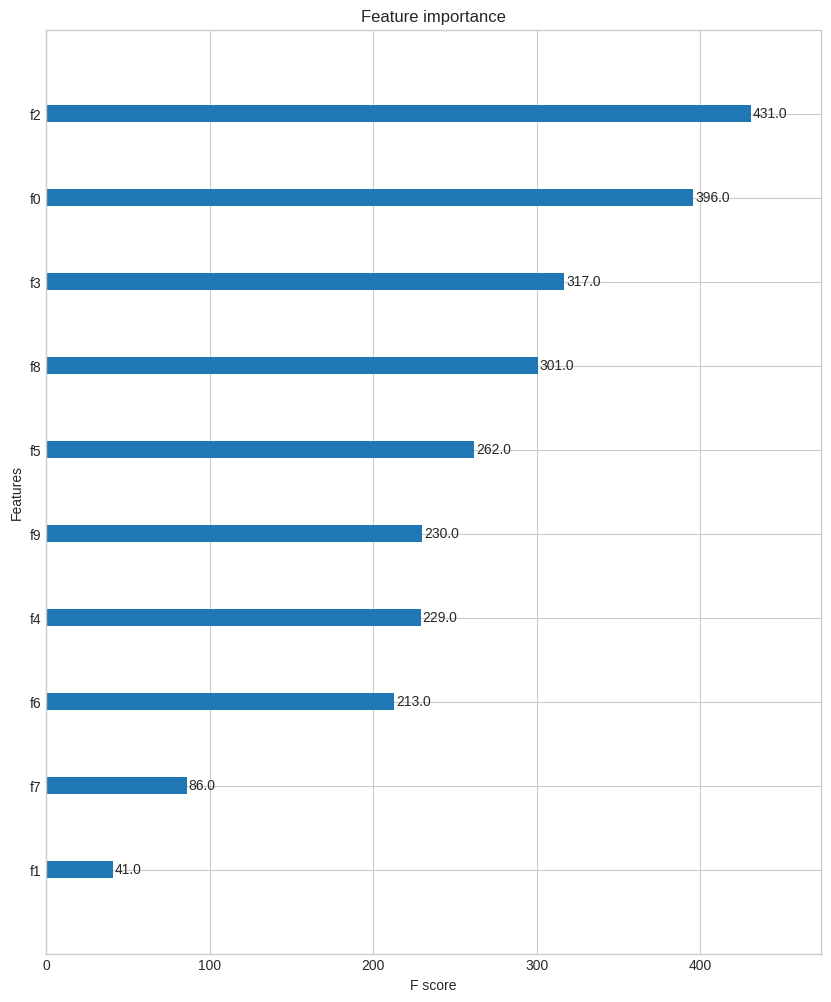

In [49]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax);

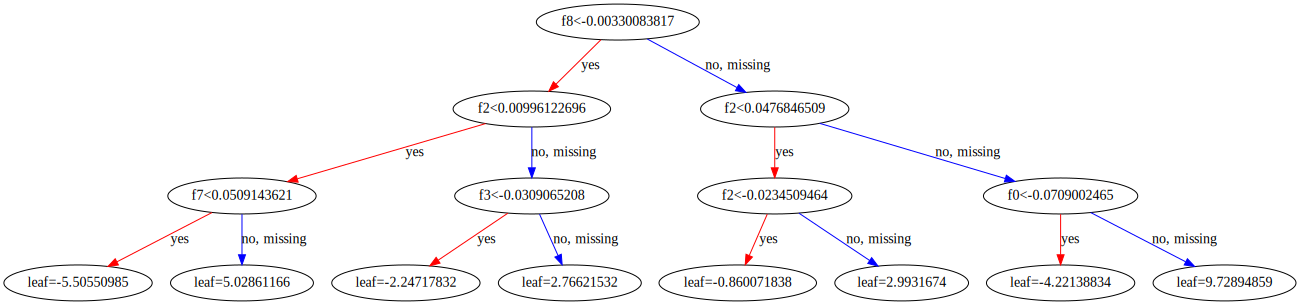

In [50]:
dot_data = xgb.to_graphviz(xgbc)
dot_data_string = dot_data.source
graph = graphviz.Source(dot_data_string)
graph

# LightGBM( XGB보다 약 2년 후 나온 모델)

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할

In [51]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

## LGBMClassifier

### 붓꽃 데이터

In [73]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [74]:
from lightgbm import LGBMClassifier, early_stopping

lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]


lgbmc.fit(X_train, y_train,
          eval_metric="logloss",
          eval_set=evals,
          callbacks=[early_stopping(stopping_rounds=100, verbose=True)])
preds = lgbmc.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.176574
[LightGBM] [Info] Start training from score -1.003302
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [80]:

cross_val = cross_validate(
    estimator=lgbmc,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time {} (+ / - {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time {} (+ / - {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score {} (+ / - {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

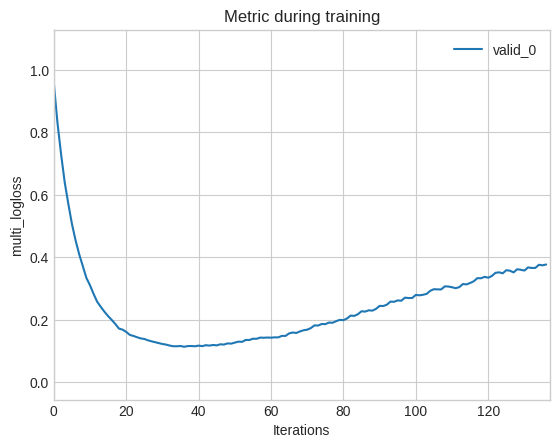

In [83]:
plot_metric(lgbmc);

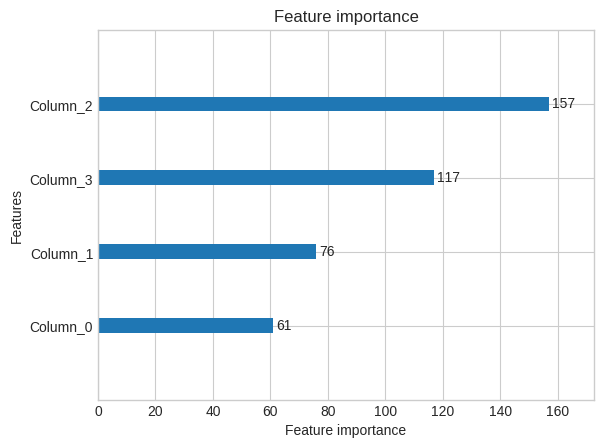

In [84]:
plot_importance(lgbmc);

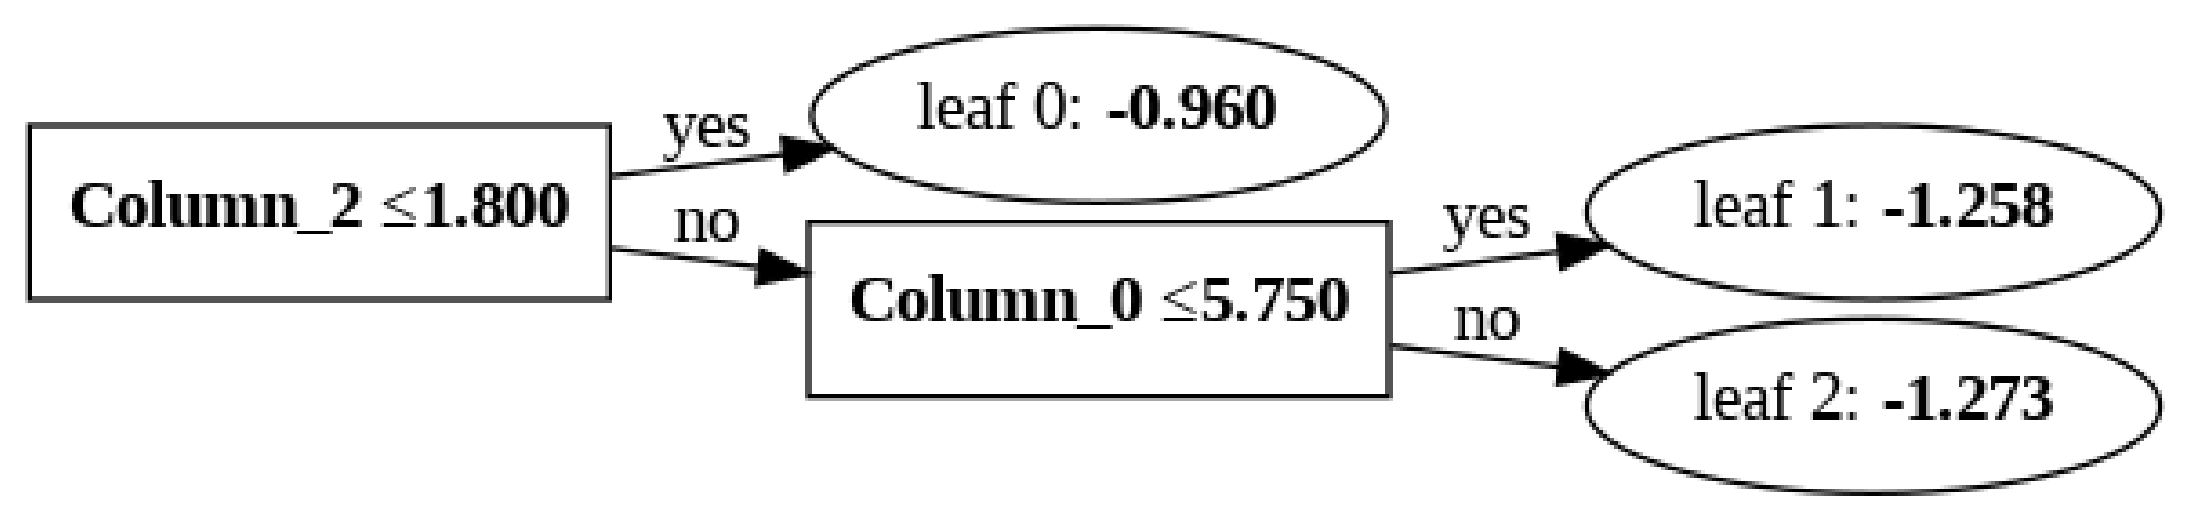

In [85]:
plot_tree(lgbmc, figsize=(28,24));

### 와인 데이터

In [86]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)

In [91]:
lgbmc = LGBMClassifier(n_estimators=400, verbosity=1)
evals = [(X_test, y_test)]


lgbmc.fit(X_train, y_train,
          eval_metric="logloss",
          eval_set=evals,
          callbacks=[early_stopping(stopping_rounds=100)])

preds = lgbmc.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 13
[LightGBM] [Info] Start training from score -1.024001
[LightGBM] [Info] Start training from score -0.861482
[LightGBM] [Info] Start training from score -1.521840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [92]:
cross_val = cross_validate(
    estimator=lgbmc,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

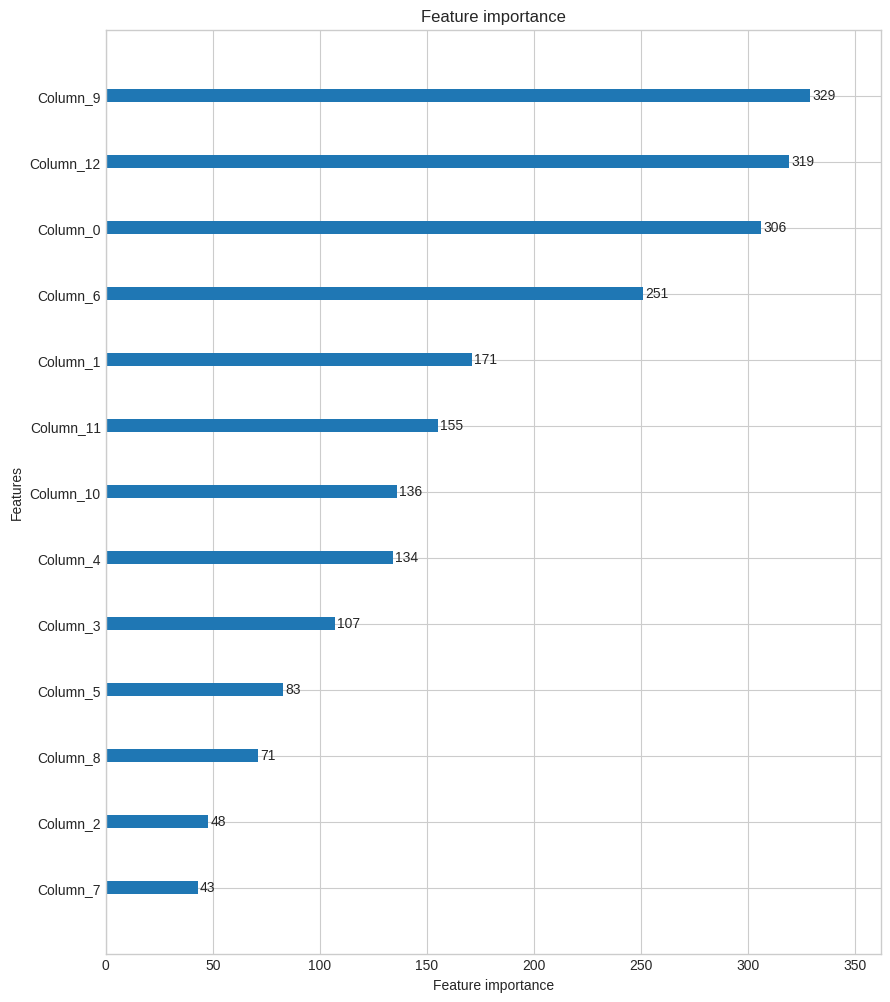

In [93]:
plot_importance(lgbmc, figsize=(10,12));

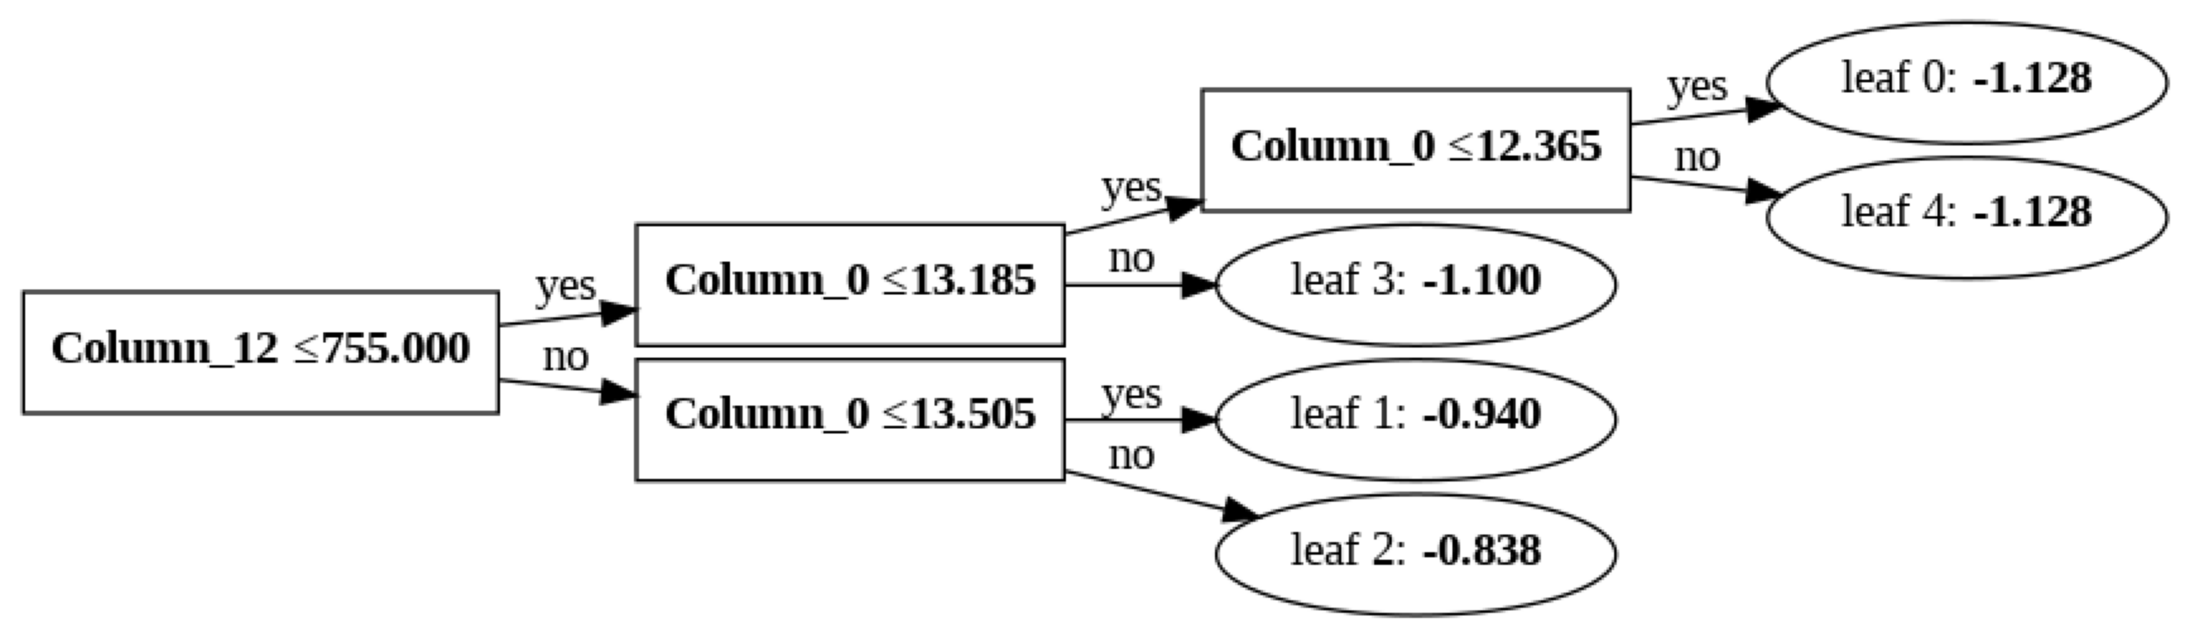

In [94]:
plot_tree(lgbmc, figsize=(28, 24));

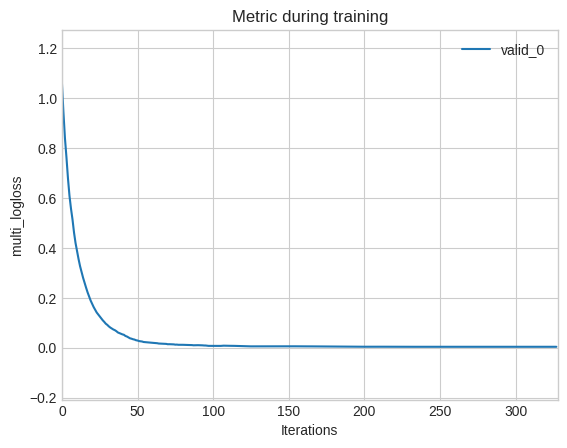

In [95]:
plot_metric(lgbmc);

## LGBMRegressor

### 당뇨병 데이터

In [96]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)

In [102]:
lgbmr = LGBMRegressor(n_estimators=400, verbosity=1)
evals = [(X_test, y_test)]


lgbmr.fit(X_train, y_train,
          eval_metric="logloss",
          eval_set=evals,
          callbacks=[early_stopping(stopping_rounds=100)])

preds = lgbmr.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 353, number of used features: 10
[LightGBM] [Info] Start training from score 152.427762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [103]:
cross_val = cross_validate(
    estimator=lgbmr,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 353, number of used features: 10
[LightGBM] [Info] Start training from score 156.543909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

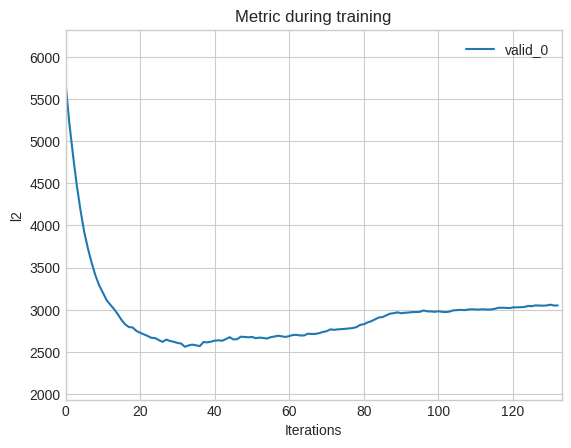

In [104]:
plot_metric(lgbmr);

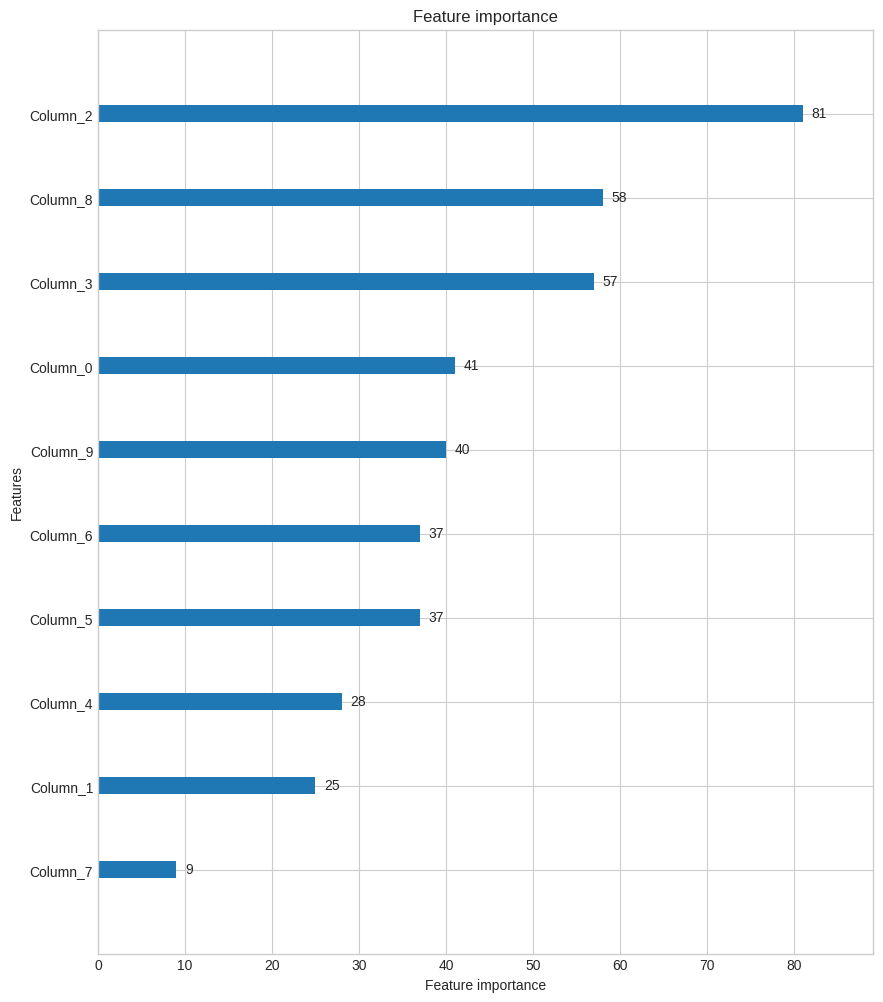

In [105]:
plot_importance(lgbmr, figsize=(10,12));

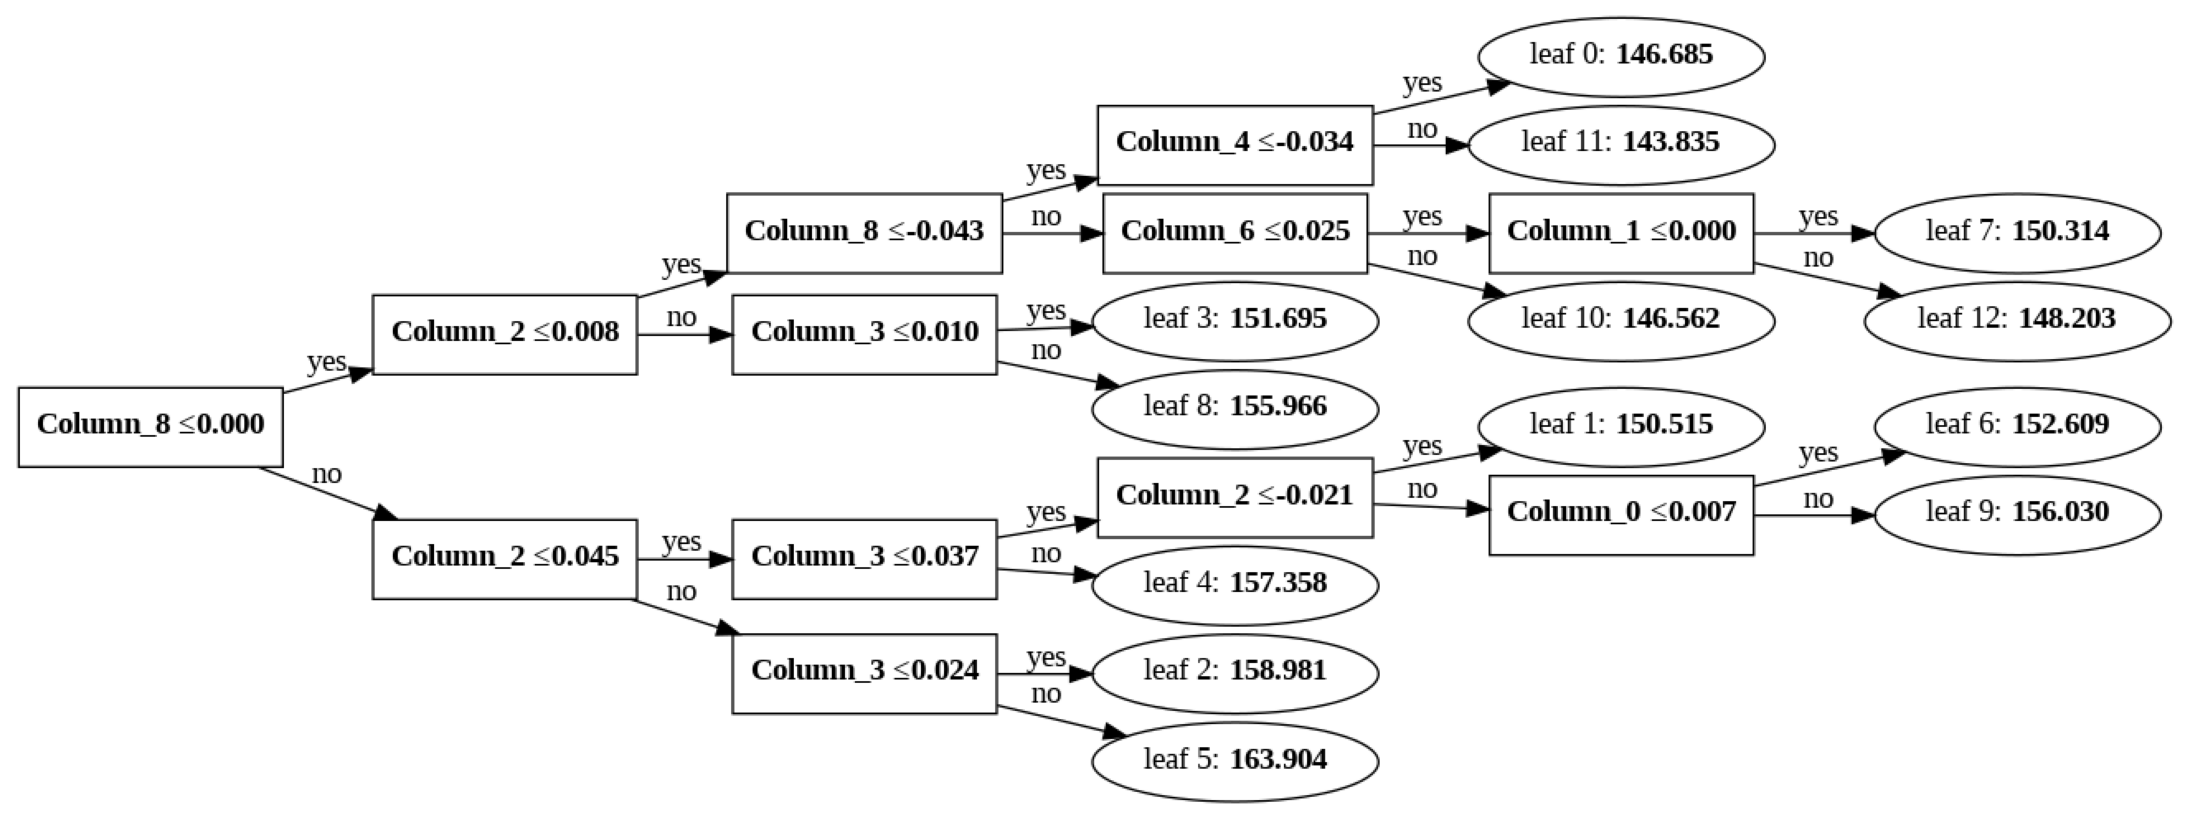

In [106]:
plot_tree(lgbmr, figsize=(28,24));